문자 '한'의 높이: 32.484375 픽셀


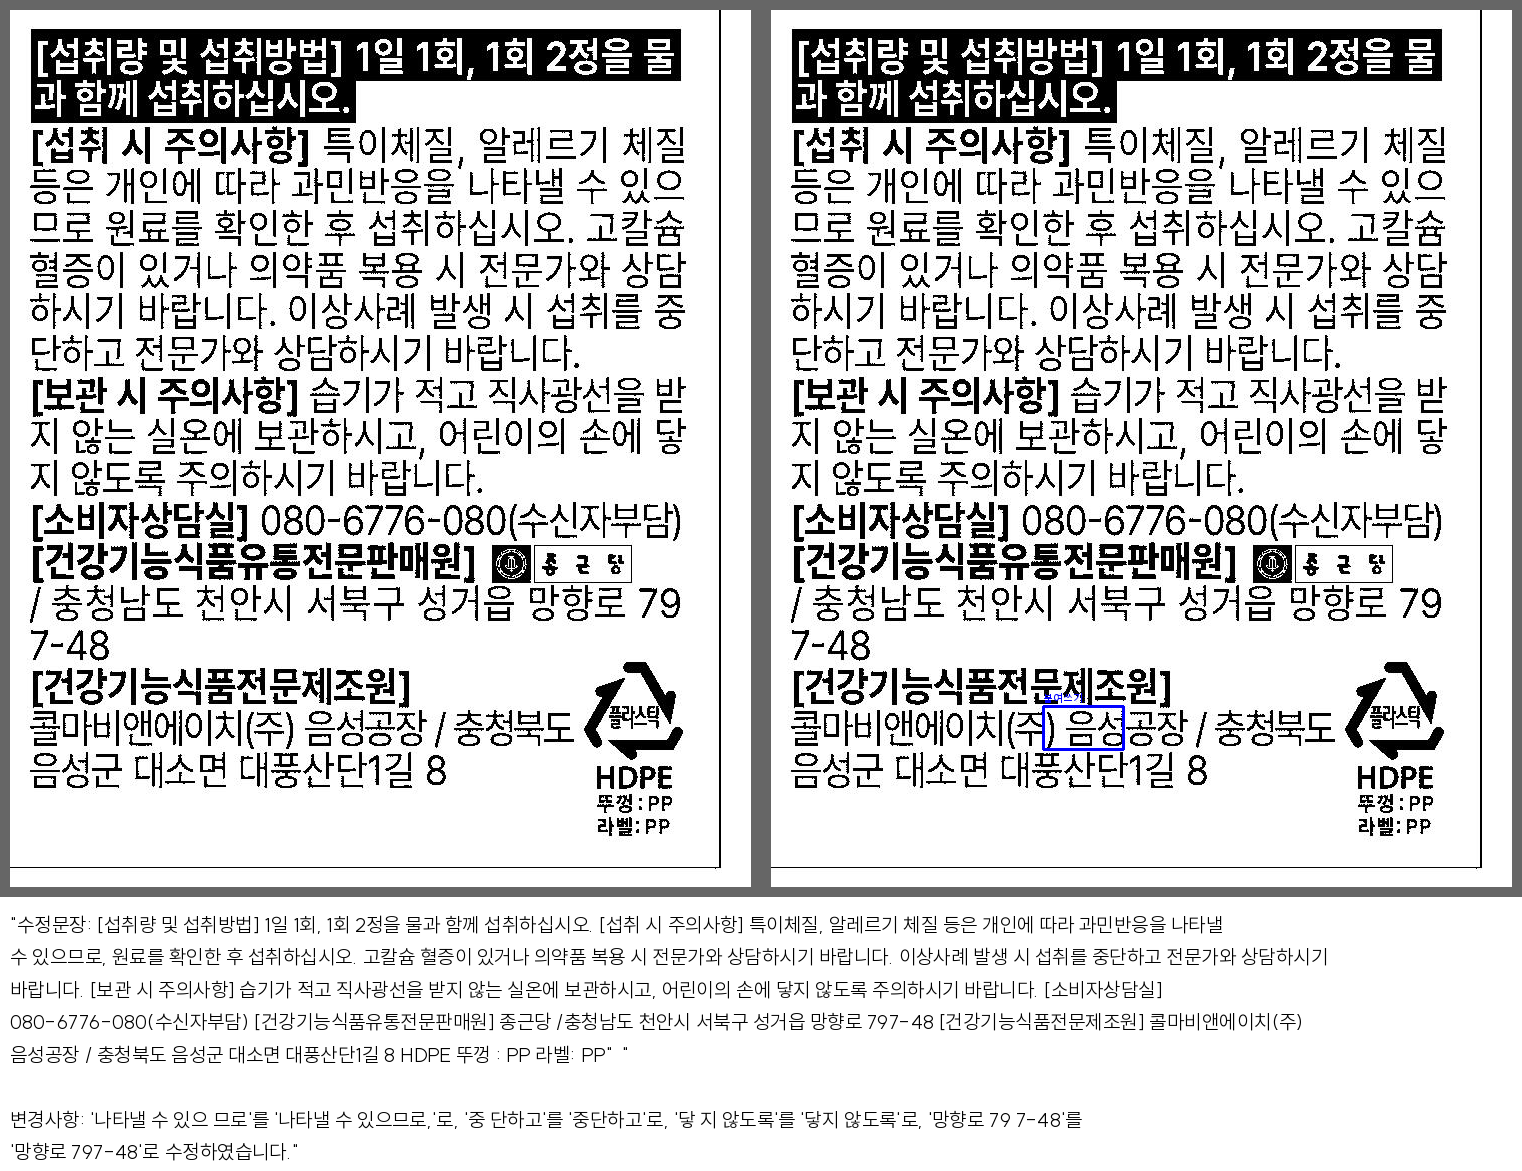

In [27]:
from OCR_anal import specialDicForOCR
from PIL import Image, ImageDraw, ImageFont
import cv2
import numpy as np

import matplotlib.pyplot as plt

import io

myDic = specialDicForOCR()
# C:\\PjtCCC\\CroppedImage\\1f369963-8f23-44d4-85bb-8d744ee0bd69.jpg
# C:\\PjtCCC\\CroppedImage\\6cb109a0-c53b-4fd5-b312-4a4d472d74ad.jpg
with io.open('C:\\PjtCCC\\CroppedImage\\6cb109a0-c53b-4fd5-b312-4a4d472d74ad.jpg', 'rb') as image_file:
    content = image_file.read()

texts = myDic.detect_text(content)
texts_rev2 = myDic.combine_boxes_for_specific_words_2(texts) #special_chars에 ['(',')'] 넣으면 괄호 앞단어 뒷단어가 좌표5이상 띄어져 있을 때 함꼐 bbox쳐짐
combined_texts = myDic.combine_boxes_for_specific_words_1(texts_rev2, ["유통", "기한"]) ##합쳐서 bbox치고 싶은 단어를 list로 받아서 bbox쳐지도록 함수화 시킴 ex)'유통' 다음 다음이 '기한'일 경우 함꼐 bbox쳐짐 
combind_image = myDic.correct_and_visualize(content, combined_texts)

text_to_check = ' '.join([getattr(t, 'description', '').replace('\n', ' ') for t in texts])
#print(text_to_check)
ret = myDic.call_GPT(text_to_check)
# print(ret)

# BGR을 RGB로 변환
image_data_rgb = cv2.cvtColor(combind_image, cv2.COLOR_BGR2RGB)

# # 이미지 표시
# plt.imshow(image_data_rgb)
# plt.axis('off')  # 좌표축 없애기
# plt.show()


original_height ,original_width, original_channels = image_data_rgb.shape
margin = 15  # 이미지 가장자리와 텍스트 사이의 여백 설정

# 텍스트 줄바꿈
changes_index = ret.index('변경사항')
first_part = ret[:changes_index].strip()
second_part = ret[changes_index:].strip()
max_text_width = original_width - 2 * margin  # 최대 텍스트 폭 설정

wrapped_first_part = myDic.wrap_text(first_part, max_text_width)
wrapped_second_part = myDic.wrap_text(second_part, max_text_width)
combined_text = wrapped_first_part + [''] + wrapped_second_part
# 텍스트 그리기를 위한 추가 코드는 여기에 포함시킵니다.
# ...
# 특정 문자의 높이 계산
char = '한'  # 원하는 문자
char_height = myDic.font.getlength(char) + margin
# print(f"문자 '{char}'의 높이: {char_height} 픽셀")

new_height = int(original_height + char_height * len(combined_text)) + margin
# aa = len(combined_text)
# print(f'{new_height} = {original_height} + {char_height} * {aa}')
# 새 이미지 생성 및 원본 이미지 붙이기
# NumPy 배열을 PIL Image 객체로 변환
image_data_rgb_pil = Image.fromarray(image_data_rgb)
new_image = Image.new('RGB', (original_width, new_height), 'white')
new_image.paste(image_data_rgb_pil, (0, 0))

# 텍스트 그리기
draw = ImageDraw.Draw(new_image)
current_y = original_height + margin  # 원본 이미지 아래에 텍스트 시작

for line in combined_text:
    draw.text((10, current_y), line, fill='black', font=myDic.font)
    current_y += char_height  # 다음 텍스트 줄의 y 위치 설정

# 이미지 저장
# output_image_path = 'Work\\HrBaek\\result_with_text.jpg'
# new_image.save(output_image_path)
new_image


In [20]:
# 폰트 파일 경로
font_path = "./SUIT-ttf/SUIT-Light.ttf"

# 폰트 크기 설정
font_size = 20

# 폰트 객체 생성
font = ImageFont.truetype(font_path, font_size)

# 특정 문자의 높이 계산
char = '한'  # 원하는 문자
char_height = font.getlength(char)

print(f"문자 '{char}'의 높이: {char_height} 픽셀")

문자 '한'의 높이: 17.484375 픽셀
